C:\Users\SBA\AppData\Local\Temp\ipykernel_22136\1031048714.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\SBA\AppData\Local\Temp\ipykernel_22136\1031048714.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


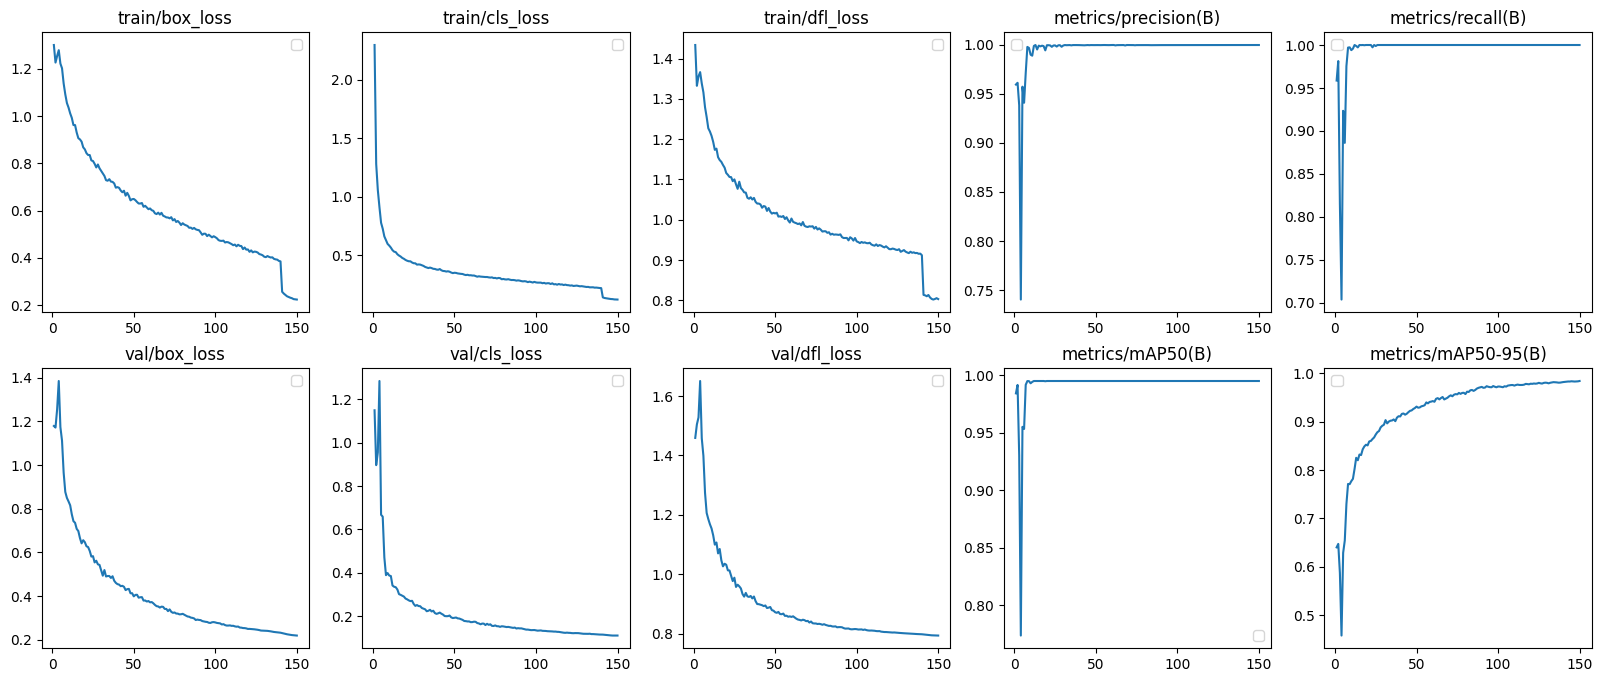

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
data = pd.read_csv('results.csv')

# 컬럼 이름에서 공백 제거
data.columns = [col.strip() for col in data.columns]

# 컬럼 이름 순서에 맞게 변경
data.columns = ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
                'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

# 시각화 설정
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# 윗줄 플롯할 컬럼들 (TRAIN 관련 5개)
plot_columns_top = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                    'metrics/precision(B)', 'metrics/recall(B)']

# 아랫줄 플롯할 컬럼들 (VALID LOSS 3개 + METRICS 관련 2개)
plot_columns_bottom = ['val/box_loss', 'val/cls_loss', 'val/dfl_loss', 
                       'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

# 윗줄 플롯
for i, v in enumerate(plot_columns_top):
    ax = axs[0, i]  # 첫 번째 줄에 해당 컬럼 배치
    ax.plot(data['epoch'], data[v])
    ax.set_title(v)
    ax.legend()

# 아랫줄 플롯
for i, v in enumerate(plot_columns_bottom):
    ax = axs[1, i]  # 두 번째 줄에 해당 컬럼 배치
    ax.plot(data['epoch'], data[v])
    ax.set_title(v)
    ax.legend()

# 결과 저장 및 출력
plt.savefig('results.png')
plt.show()
